# **CELL0027 Discrete Random Walker Model of Neural Crest Cell Migration**

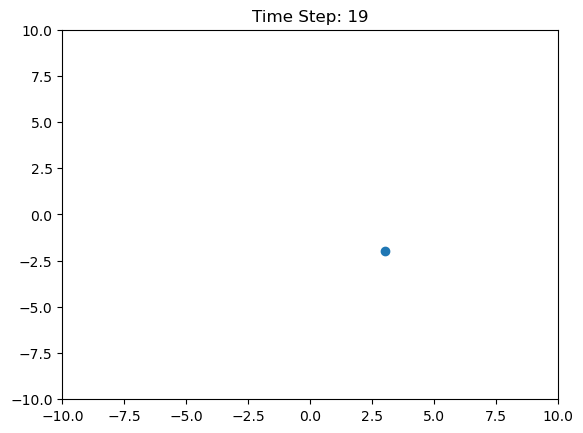

In [1]:
#-------------
# Position of a single particle at each time step.

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython import display
from time import sleep

# Set parameters
num_particles = 1
num_timesteps = 20
timestep = 1
## Altered the code to have a 2 dimentional array, rather than a 1 dimentional one.
starting_position = np.array([0, 0])
move_dist = 1
## Changed the posible directions to be in 2 dimentions
##  represents the set of possible movements in 2D space: left, right, up, or down.
## Each direction is represented as a 2-element array [dx, dy], where dx is the change in x-coordinate and dy is the change in y-coordinate.
possible_directions = np.array([[-1, 0], [1, 0], [0, -1], [0, 1]])

# Initialise position vector
position = np.zeros((num_timesteps, num_particles, 2))
for j in range(num_particles):
    position[0, j] = starting_position

# Randomly sample the move direction for all timesteps
## sample the move directions in both x and y direction.
move_directions = np.random.randint(
    low=0, high=possible_directions.shape[0], size=(num_timesteps, num_particles))

# Loop over timepoints for each particle and solve for position based on movement
for j in range(num_particles):
    for i in range(1, num_timesteps):
        position[i, j] = position[i-1, j] + \
            move_dist * possible_directions[move_directions[i, j]]

# Plotting
fig, ax = plt.subplots()

# Generate plot and update at each timestep
for i in range(1, num_timesteps):
    ax.clear()
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.scatter(position[i, :, 0], position[i, :, 1])
    title_str = 'Time Step: {}'.format(i)
    ax.set_title(title_str)
    display.display(fig)
    display.clear_output(wait=True)
    sleep(0.1)



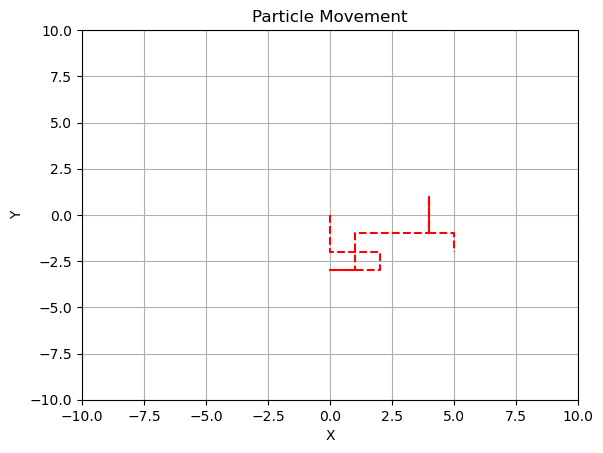

In [2]:
#---------
# Plotted the path of a single particle

import numpy as np
import matplotlib.pyplot as plt

# Set parameters
num_particles = 1
num_timesteps = 20
timestep = 1
starting_position = np.array([0, 0])
move_dist = 1
possible_directions = np.array([[-1, 0], [1, 0], [0, -1], [0, 1]])

# Initialise position vector
position = np.zeros((num_timesteps, num_particles, 2))
for j in range(num_particles):
    position[0, j] = starting_position

# Randomly sample the move direction for all timesteps
move_directions = np.random.randint(
    low=0, high=possible_directions.shape[0], size=(num_timesteps, num_particles))

# Simulate particle movement
for j in range(num_particles):
    for i in range(1, num_timesteps):
        position[i, j] = position[i-1, j] + move_dist * possible_directions[move_directions[i, j]]

# Plot particle path
plt.figure()
for j in range(num_particles):
    plt.plot(position[:, j, 0], position[:, j, 1], 'r--')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.title('Particle Movement')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()


/var/folders/k5/4bj_9cj17wq3j_ltx416f02w0000gn/T/ipykernel_81252/3155373435.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab10')


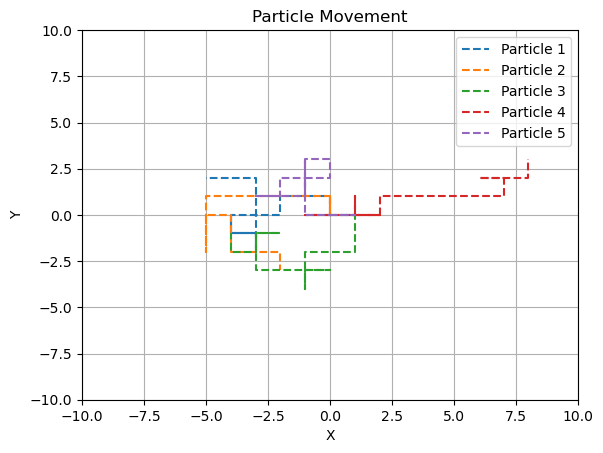

In [3]:
#----------
# Path of 5 particles plotted

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

# Set parameters
num_particles = 5  # Increase the number of particles
num_timesteps = 20
timestep = 1
## Every particle is starting at the same position here.
starting_positions = np.zeros((num_particles, 2))  # Starting positions for each particle
move_dist = 1
possible_directions = np.array([[-1, 0], [1, 0], [0, -1], [0, 1]])

# Initialize position vectors for each particle
positions = np.zeros((num_timesteps, num_particles, 2))
positions[0] = starting_positions

# Randomly sample the move direction for all timesteps and particles
move_directions = np.random.randint(
    low=0, high=possible_directions.shape[0], size=(num_timesteps, num_particles))

# Simulate particle movement
for j in range(num_particles):
    for i in range(1, num_timesteps):
        positions[i, j] = positions[i-1, j] + move_dist * possible_directions[move_directions[i, j]]

# Create a color map for assigning unique colors to each particle
cmap = get_cmap('tab10')

# Plot particle paths
plt.figure()
for j in range(num_particles):
    plt.plot(positions[:, j, 0], positions[:, j, 1], color=cmap(j), linestyle='--', label=f'Particle {j+1}')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.title('Particle Movement')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.savefig('no_bias_particle_movement.png')
plt.show()


/var/folders/k5/4bj_9cj17wq3j_ltx416f02w0000gn/T/ipykernel_81252/4132398910.py:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab10')


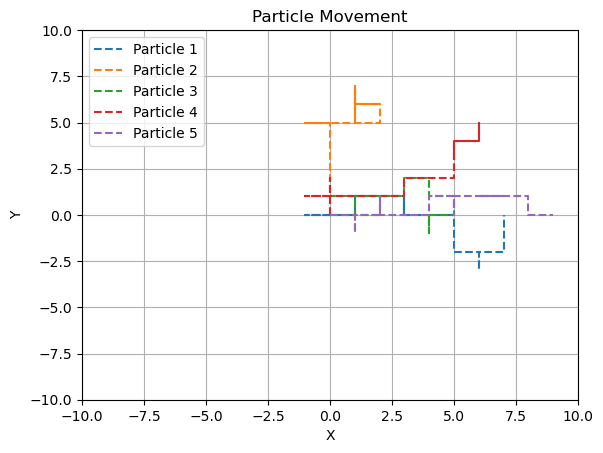

In [4]:
#-----------
# Adding in a Chemo-attractant biasing the movement of the particle to the right.

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display
from time import sleep
from matplotlib.cm import get_cmap

# Set parameters
num_particles = 5
num_timesteps = 20
timestep = 1
starting_position = np.array([0, 0])
move_dist = 1

# Define possible directions with biased probabilities
possible_directions = np.array([[-1, 0], [1, 0], [0, -1], [0, 1]])
probabilities = np.array([1/6, 1/3, 1/4, 1/4])  # Biased probabilities

# Initialize position vector
position = np.zeros((num_timesteps, num_particles, 2))
for j in range(num_particles):
    position[0, j] = starting_position

# Randomly sample the move direction for all timesteps with biased probabilities
move_directions = np.random.choice(
    a=np.arange(possible_directions.shape[0]), size=(num_timesteps, num_particles), p=probabilities)

# Loop over timepoints for each particle and solve for position based on movement
for j in range(num_particles):
    for i in range(1, num_timesteps):
        position[i, j] = position[i-1, j] + move_dist * possible_directions[move_directions[i, j]]

# Create a color map for assigning unique colors to each particle
cmap = get_cmap('tab10')

# Plot particle paths
plt.figure()
for j in range(num_particles):
    plt.plot(position[:, j, 0], position[:, j, 1], color=cmap(j), linestyle='--', label=f'Particle {j+1}')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.title('Particle Movement')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.savefig('bias_particle_movement.png')
plt.show()


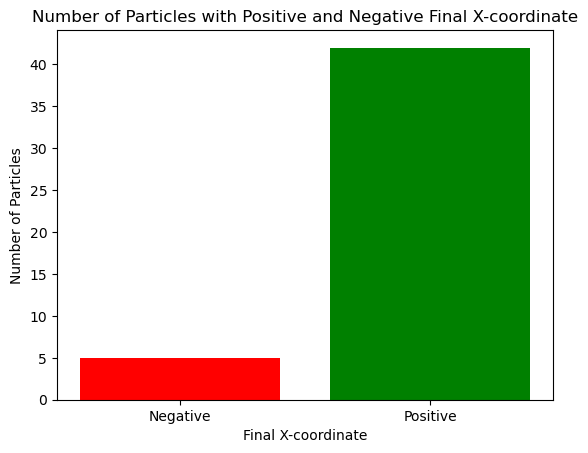

Number of particles with positive x-coordinate: 42
Number of particles with negative x-coordinate: 5


In [14]:
#--------
# Inspecting whether the chemoattractant does bias the particles movement to the right (positive x-direction)

import numpy as np
import matplotlib.pyplot as plt

# Set parameters
num_particles = 50
num_timesteps = 20
timestep = 1
starting_position = np.array([0, 0])
move_dist = 1

# Define possible directions with biased probabilities
possible_directions = np.array([[-1, 0], [1, 0], [0, -1], [0, 1]])
#probabilities = np.array([1/4, 1/4, 1/4, 1/4])  # Equal probabilities
probabilities = np.array([1/6, 1/3, 1/4, 1/4])  # Biased probabilities

# Initialize position vector
position = np.zeros((num_timesteps, num_particles, 2))
for j in range(num_particles):
    position[0, j] = starting_position

# Randomly sample the move direction for all timesteps with biased probabilities
move_directions = np.random.choice(
    a=np.arange(possible_directions.shape[0]), size=(num_timesteps, num_particles), p=probabilities)

# Track the sign of the final x-coordinate for each particle
final_x_sign = np.zeros(num_particles)

# Loop over timepoints for each particle and solve for position based on movement
for j in range(num_particles):
    for i in range(1, num_timesteps):
        move = move_dist * possible_directions[move_directions[i, j]]
        position[i, j] = position[i-1, j] + move

# Determine the sign of the final x-coordinate for each particle
for j in range(num_particles):
    final_x_sign[j] = np.sign(position[-1, j, 0])

# Count the number of particles with positive and negative final x-coordinate
positive_count = np.sum(final_x_sign == 1)
negative_count = np.sum(final_x_sign == -1)

# Plot bar chart showing the number of particles with positive and negative final x-coordinate
plt.figure()
plt.bar(['Negative', 'Positive'], [negative_count, positive_count], color=['r', 'g'])
plt.xlabel('Final X-coordinate')
plt.ylabel('Number of Particles')
plt.title('Number of Particles with Positive and Negative Final X-coordinate')
plt.savefig('X_coordinate_sign.png')
plt.show()

print("Number of particles with positive x-coordinate:", positive_count)
print("Number of particles with negative x-coordinate:", negative_count)

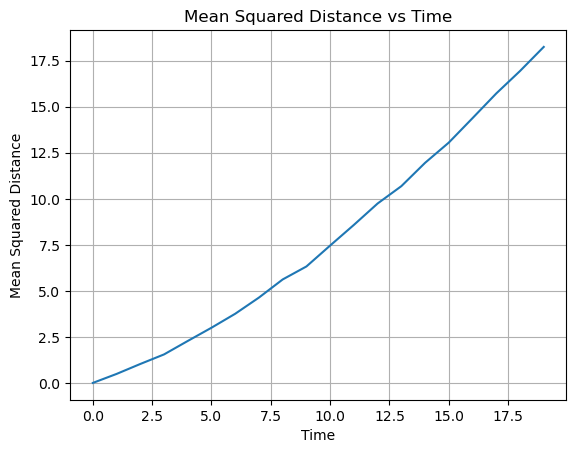

Gradient (slope) of the line: 0.9751225563909778


In [6]:
#--------
# MSD vs time for the simulation with chemoattractant bias

import numpy as np
import matplotlib.pyplot as plt

# Set parameters
num_particles = 1000
num_timesteps = 20
timestep = 1
starting_position = 0
move_dist = 1

# Define possible directions with biased probabilities
possible_directions = np.array([[-1, 0], [1, 0], [0, -1], [0, 1]])
probabilities = np.array([1/6, 1/3, 1/4, 1/4])  # Biased probabilities

# Initialise position vector
position = np.zeros((num_timesteps, num_particles))
for j in range(num_particles):
    position[0, j] = starting_position

# Randomly sample the move direction for all timesteps with biased probabilities
move_directions = np.random.choice(
    a=np.arange(possible_directions.shape[0]), size=(num_timesteps, num_particles), p=probabilities)

# Initialize array to store mean squared distance
mean_squared_distance = np.zeros(num_timesteps)

# Loop over timepoints for each particle and solve for position based on movement
for j in range(num_particles):
    for i in range(1, num_timesteps):
        direction_vector = possible_directions[move_directions[i, j]]  # Retrieve the direction vector
        position[i, j] = position[i-1, j] + move_dist * direction_vector[0]  # Update x-coordinate
        # Note: You may add more dimensions for multi-dimensional movements if needed

# Calculate mean squared distance at each time step (outside the loop)
for i in range(num_timesteps):
    mean_squared_distance[i] = np.mean((position[i] - starting_position) ** 2)

# Plot mean squared distance over time
plt.plot(range(num_timesteps), mean_squared_distance)
plt.xlabel('Time')
plt.ylabel('Mean Squared Distance')
plt.title('Mean Squared Distance vs Time')
plt.grid(True)
plt.savefig('biased_MSD_vs_T.png')
plt.show()

# Fit a line to the data using polynomial regression (degree 1)
slope, intercept = np.polyfit(range(num_timesteps), mean_squared_distance, 1)

# printing the gradient of the line or alpha
print("Gradient (slope) of the line:", slope)



/var/folders/k5/4bj_9cj17wq3j_ltx416f02w0000gn/T/ipykernel_81252/144808039.py:59: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab10')


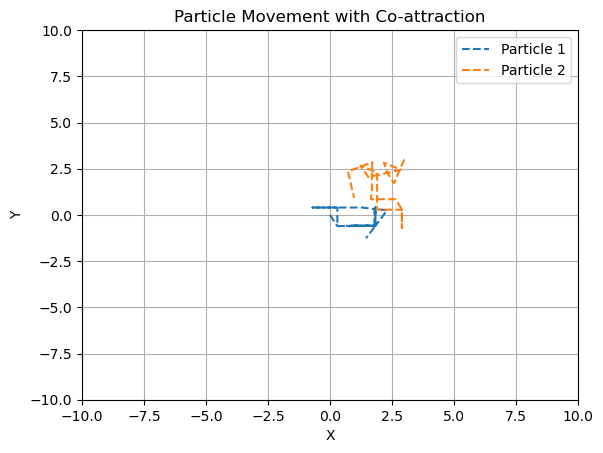

In [7]:
#---------
# Implimenting a co-attraction and no bias into the model

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

# Set parameters
num_particles = 2  # Increase the number of particles
num_timesteps = 20
timestep = 1
starting_positions = np.array([[0, 0], [3, 3], [5, 5]])
move_dist = 1

# Define possible directions with biased probabilities
possible_directions = np.array([[-1, 0], [1, 0], [0, -1], [0, 1]])
probabilities = np.array([1/4, 1/4, 1/4, 1/4])  # Equal probabilities

# Initialize position vector
position = np.zeros((num_timesteps, num_particles, 2))

# Set initial positions for each particle
for j in range(num_particles):
    position[0, j] = starting_positions[j]

# Randomly sample the move direction for all timesteps with biased probabilities
move_directions = np.random.choice(
    a=np.arange(possible_directions.shape[0]), size=(num_timesteps, num_particles), p=probabilities)

# Function to calculate Euclidean distance between two points
def distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Loop over timepoints for each particle and solve for position based on movement
for j in range(num_particles):
    for i in range(1, num_timesteps):
        new_position = position[i-1, j] + move_dist * possible_directions[move_directions[i, j]]

        # Check if particles are close enough to move towards each other
        for k in range(num_particles):
            if k != j:  # Exclude the current particle
                other_particle = position[i-1, k]
                dist = distance(new_position, other_particle)
                if dist < 10 and dist > 2:  # Adjust the threshold distance as needed
                    direction_towards_other = other_particle - new_position
                    direction_towards_other /= np.linalg.norm(direction_towards_other)  # Normalize direction

                    # Move towards each other if not too close, move away if too close
                    new_position += direction_towards_other * move_dist * 0.5  # Move half the distance towards other particle

                #if dist < 2:  # If too close, move away
                    #direction_away_from_other = new_position - other_particle
                    #direction_away_from_other /= np.linalg.norm(direction_away_from_other)  # Normalize direction
                    #new_position += direction_away_from_other * move_dist * 0.5  # Move half the distance away from other particle

        position[i, j] = new_position

# Create a color map for assigning unique colors to each particle
cmap = get_cmap('tab10')

# Plot particle paths
plt.figure()
for j in range(num_particles):
    plt.plot(position[:, j, 0], position[:, j, 1], color=cmap(j), linestyle='--', label=f'Particle {j+1}')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.title('Particle Movement')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.title('Particle Movement with Co-attraction')
plt.savefig('Particle Movement with Co-attraction.png')
plt.show()



/var/folders/k5/4bj_9cj17wq3j_ltx416f02w0000gn/T/ipykernel_81252/2114979776.py:59: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab10')


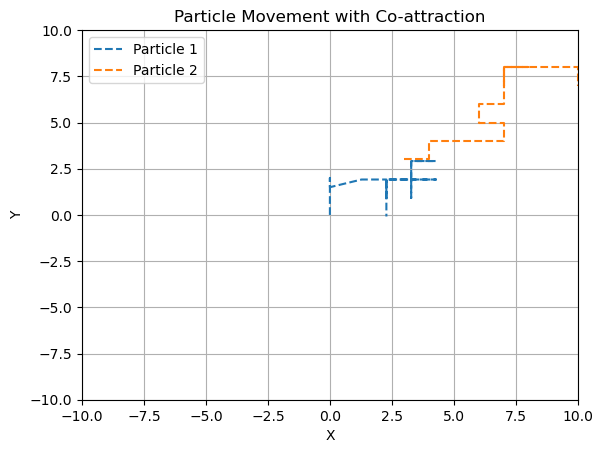

In [8]:
#---------
# Implimenting contact inhibition and no bias into the model

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

# Set parameters
num_particles = 2  # Increase the number of particles
num_timesteps = 20
timestep = 1
starting_positions = np.array([[0, 0], [3, 3], [5, 5]])
move_dist = 1

# Define possible directions with biased probabilities
possible_directions = np.array([[-1, 0], [1, 0], [0, -1], [0, 1]])
probabilities = np.array([1/4, 1/4, 1/4, 1/4])  # Equal probabilities

# Initialize position vector
position = np.zeros((num_timesteps, num_particles, 2))

# Set initial positions for each particle
for j in range(num_particles):
    position[0, j] = starting_positions[j]

# Randomly sample the move direction for all timesteps with biased probabilities
move_directions = np.random.choice(
    a=np.arange(possible_directions.shape[0]), size=(num_timesteps, num_particles), p=probabilities)

# Function to calculate Euclidean distance between two points
def distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Loop over timepoints for each particle and solve for position based on movement
for j in range(num_particles):
    for i in range(1, num_timesteps):
        new_position = position[i-1, j] + move_dist * possible_directions[move_directions[i, j]]

        # Check if particles are close enough to move towards each other
        for k in range(num_particles):
            if k != j:  # Exclude the current particle
                other_particle = position[i-1, k]
                dist = distance(new_position, other_particle)
                #if dist < 10 and dist > 2:  # Adjust the threshold distance as needed
                    #direction_towards_other = other_particle - new_position
                    #direction_towards_other /= np.linalg.norm(direction_towards_other)  # Normalize direction

                    # Move towards each other if not too close, move away if too close
                    #new_position += direction_towards_other * move_dist * 0.5  # Move half the distance towards other particle

                if dist < 2:  # If too close, move away
                    direction_away_from_other = new_position - other_particle
                    direction_away_from_other /= np.linalg.norm(direction_away_from_other)  # Normalize direction
                    new_position += direction_away_from_other * move_dist * 0.5  # Move half the distance away from other particle

        position[i, j] = new_position

# Create a color map for assigning unique colors to each particle
cmap = get_cmap('tab10')

# Plot particle paths
plt.figure()
for j in range(num_particles):
    plt.plot(position[:, j, 0], position[:, j, 1], color=cmap(j), linestyle='--', label=f'Particle {j+1}')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.title('Particle Movement')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.title('Particle Movement with Co-attraction')
plt.savefig('Particle Movement with Co-attraction.png')
plt.show()

/var/folders/k5/4bj_9cj17wq3j_ltx416f02w0000gn/T/ipykernel_81252/390237771.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab10')


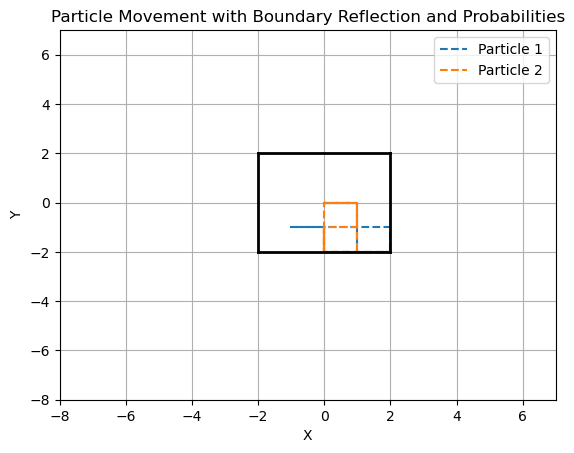

In [9]:
#-------
#Implimenting a reflective boundary into the model

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

# Set parameters
num_particles = 2
num_timesteps = 20
timestep = 1
boundary = 2  # Boundary size
grid_size = 15  # Grid size
starting_positions = np.zeros((num_particles, 2))
move_dist = 1
possible_directions = np.array([[-1, 0], [1, 0], [0, -1], [0, 1]])
probabilities = np.array([1/4, 1/4, 1/4, 1/4])  # Probabilities for each direction

# Initialize position vectors for each particle
positions = np.zeros((num_timesteps, num_particles, 2))
positions[0] = starting_positions

# Randomly sample the move direction for all timesteps and particles based on probabilities
move_directions = np.random.choice(
    range(4), size=(num_timesteps, num_particles), p=probabilities)

# Simulate particle movement with boundary reflection
for j in range(num_particles):
    for i in range(1, num_timesteps):
        new_pos = positions[i-1, j] + move_dist * possible_directions[move_directions[i, j]]
        # Check boundaries and reflect if needed
        for dim in range(2):
            if abs(new_pos[dim]) > boundary:  # Boundary check
                move_directions[i, j] = np.random.choice(range(4), p=probabilities)  # Randomize direction
                new_pos[dim] = np.sign(new_pos[dim])   # Move to boundary
        positions[i, j] = new_pos

# Create a color map for assigning unique colors to each particle
cmap = get_cmap('tab10')

# Plot particle paths
plt.figure()
for j in range(num_particles):
    plt.plot(positions[:, j, 0], positions[:, j, 1], color=cmap(j), linestyle='--', label=f'Particle {j+1}')

# Plot boundary lines
plt.plot([-boundary, -boundary], [-boundary, boundary], color='black', linestyle='-', linewidth=2)
plt.plot([boundary, boundary], [-boundary, boundary], color='black', linestyle='-', linewidth=2)
plt.plot([-boundary, boundary], [-boundary, -boundary], color='black', linestyle='-', linewidth=2)
plt.plot([-boundary, boundary], [boundary, boundary], color='black', linestyle='-', linewidth=2)

plt.xlim(-grid_size//2, grid_size//2)
plt.ylim(-grid_size//2, grid_size//2)
plt.title('Particle Movement with Boundary Reflection and Probabilities')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.savefig('reflective_boundary.png')
plt.show()



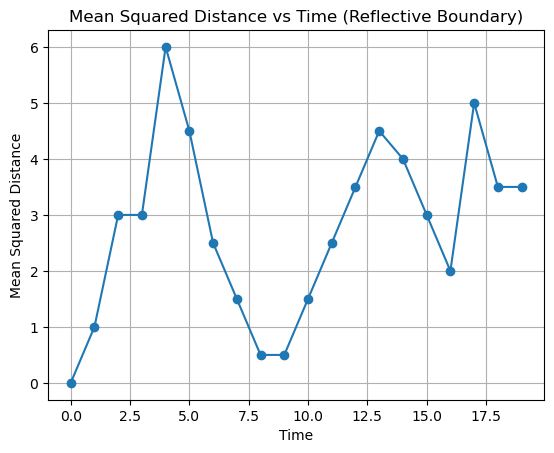

In [10]:
#------
# MSD vs Time for a reflective boundary

import numpy as np
import matplotlib.pyplot as plt

# Set parameters
num_particles = 2
num_timesteps = 20
timestep = 1
boundary = 2  # Boundary size
grid_size = 15  # Grid size
starting_positions = np.zeros((num_particles, 2))
move_dist = 1
possible_directions = np.array([[-1, 0], [1, 0], [0, -1], [0, 1]])
probabilities = np.array([1/4, 1/4, 1/4, 1/4])  # Probabilities for each direction

# Initialize position vectors for each particle
positions = np.zeros((num_timesteps, num_particles, 2))
positions[0] = starting_positions

# Randomly sample the move direction for all timesteps and particles based on probabilities
move_directions = np.random.choice(
    range(4), size=(num_timesteps, num_particles), p=probabilities)

# Simulate particle movement with reflective boundary
for j in range(num_particles):
    for i in range(1, num_timesteps):
        new_pos = positions[i-1, j] + move_dist * possible_directions[move_directions[i, j]]
        # Check boundaries and reflect if needed
        for dim in range(2):
            if abs(new_pos[dim]) > boundary:  # Boundary check
                move_directions[i, j] = np.random.choice(range(4), p=probabilities)  # Randomize direction
                new_pos[dim] = np.sign(new_pos[dim]) * boundary  # Move to boundary
        positions[i, j] = new_pos

# Calculate mean squared distance vs time
mean_squared_distance = np.mean(np.sum((positions - starting_positions)**2, axis=2), axis=1)

# Plot mean squared distance vs time
plt.plot(range(num_timesteps), mean_squared_distance, marker='o')
plt.title('Mean Squared Distance vs Time (Reflective Boundary)')
plt.xlabel('Time')
plt.ylabel('Mean Squared Distance')
plt.grid(True)
plt.savefig('reflective_boundary_MSD.png')
plt.show()

/var/folders/k5/4bj_9cj17wq3j_ltx416f02w0000gn/T/ipykernel_81252/2827840347.py:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab10')


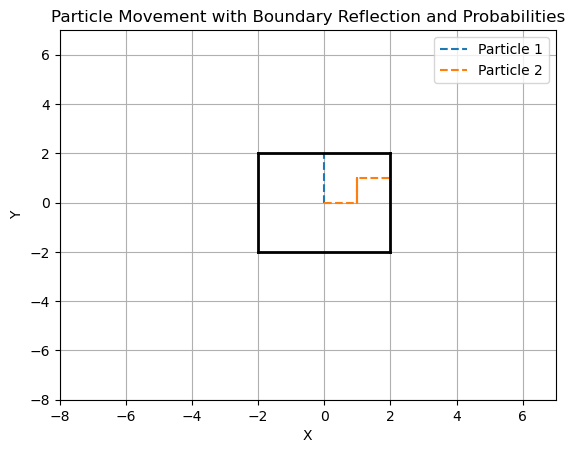

In [11]:
#-------
# Implimenting an absorbative boundary into the model

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

# Set parameters
num_particles = 2
num_timesteps = 20
timestep = 1
boundary = 2  # Boundary size
grid_size = 15  # Grid size
starting_positions = np.zeros((num_particles, 2))
move_dist = 1
possible_directions = np.array([[-1, 0], [1, 0], [0, -1], [0, 1]])
probabilities = np.array([1/4, 1/4, 1/4, 1/4])  # Probabilities for each direction

# Initialize position vectors for each particle
positions = np.zeros((num_timesteps, num_particles, 2))
positions[0] = starting_positions
is_stopped = np.zeros((num_particles,), dtype=bool)

# Randomly sample the move direction for all timesteps and particles based on probabilities
move_directions = np.random.choice(
    range(4), size=(num_timesteps, num_particles), p=probabilities)

# Simulate particle movement with boundary reflection
for i in range(1, num_timesteps):
    for j in range(num_particles):
        if is_stopped[j]:
            positions[i, j] = positions[i-1, j]  # Particle stays in place if stopped
            continue

        new_pos = positions[i-1, j] + move_dist * possible_directions[move_directions[i, j]]
        # Check boundaries and stop if needed
        for dim in range(2):
            if abs(new_pos[dim]) >= boundary:  # Boundary check
                new_pos[dim] = np.sign(new_pos[dim]) * boundary  # Move to boundary
                is_stopped[j] = True  # Mark particle as stopped

        positions[i, j] = new_pos

# Create a color map for assigning unique colors to each particle
cmap = get_cmap('tab10')

# Plot particle paths
plt.figure()
for j in range(num_particles):
    plt.plot(positions[:, j, 0], positions[:, j, 1], color=cmap(j), linestyle='--', label=f'Particle {j+1}')

# Plot boundary lines
plt.plot([-boundary, -boundary], [-boundary, boundary], color='black', linestyle='-', linewidth=2)
plt.plot([boundary, boundary], [-boundary, boundary], color='black', linestyle='-', linewidth=2)
plt.plot([-boundary, boundary], [-boundary, -boundary], color='black', linestyle='-', linewidth=2)
plt.plot([-boundary, boundary], [boundary, boundary], color='black', linestyle='-', linewidth=2)

plt.xlim(-grid_size//2, grid_size//2)
plt.ylim(-grid_size//2, grid_size//2)
plt.title('Particle Movement with Boundary Reflection and Probabilities')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.savefig('absorbative_boundary.png')
plt.show()




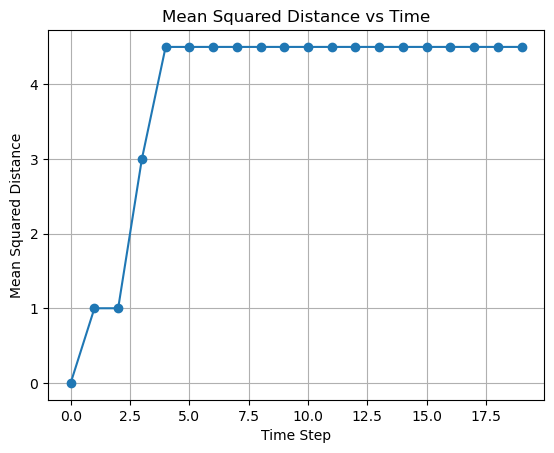

In [12]:
#--------
# MSD vs Time for an apsorbtive boundary


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

# Set parameters
num_particles = 2
num_timesteps = 20
timestep = 1
boundary = 2  # Boundary size
grid_size = 15  # Grid size
starting_positions = np.zeros((num_particles, 2))
move_dist = 1
possible_directions = np.array([[-1, 0], [1, 0], [0, -1], [0, 1]])
probabilities = np.array([1/4, 1/4, 1/4, 1/4])  # Probabilities for each direction

# Initialize position vectors for each particle
positions = np.zeros((num_timesteps, num_particles, 2))
positions[0] = starting_positions
is_stopped = np.zeros((num_particles,), dtype=bool)

# Randomly sample the move direction for all timesteps and particles based on probabilities
move_directions = np.random.choice(
    range(4), size=(num_timesteps, num_particles), p=probabilities)

# Simulate particle movement with boundary reflection
for i in range(1, num_timesteps):
    for j in range(num_particles):
        if is_stopped[j]:
            positions[i, j] = positions[i-1, j]  # Particle stays in place if stopped
            continue

        new_pos = positions[i-1, j] + move_dist * possible_directions[move_directions[i, j]]
        # Check boundaries and stop if needed
        for dim in range(2):
            if abs(new_pos[dim]) >= boundary:  # Boundary check
                new_pos[dim] = np.sign(new_pos[dim]) * boundary  # Move to boundary
                is_stopped[j] = True  # Mark particle as stopped

        positions[i, j] = new_pos

# Calculate mean squared distance for each time step across all particles
msd = np.zeros(num_timesteps)
for i in range(num_timesteps):
    total_distance = 0
    for j in range(num_particles):
        total_distance += np.sum((positions[i, j] - positions[0, j]) ** 2)
    msd[i] = total_distance / num_particles

# Plot mean squared distance vs time
plt.plot(np.arange(num_timesteps), msd, marker='o')
plt.xlabel('Time Step')
plt.ylabel('Mean Squared Distance')
plt.title('Mean Squared Distance vs Time')
plt.grid(True)
plt.savefig('absorbative_MSD.png')
plt.show()